# **Bank Customer's Churn Classification**
*Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.*

*Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling*

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [0]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Churn_Modelling.csv')

# **Exploring the dataset**

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


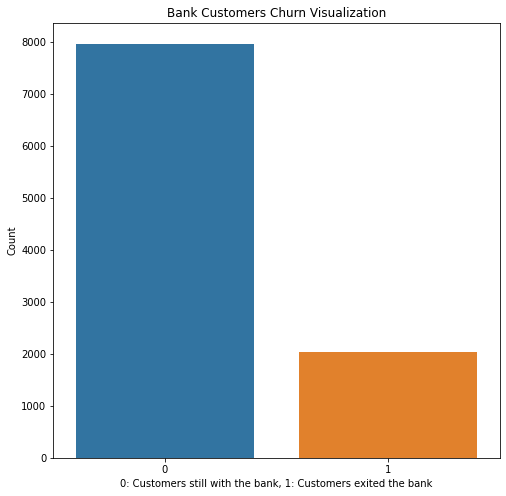

In [10]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [11]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [12]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# **Feature Engineering**

*Converting categorical features into numerical features using get_dummies()*

In [0]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [14]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [0]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

# **Data Preprocessing**

*• Split the dataset into independent features (ie: X) and label (ie: y).*

*• Split the dataset further into train and test sets.*

*• Apply feature scaling to train and test sets of independent features.*

In [0]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building Artificial Neural Network (ANN)**

In [19]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [0]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 426us/step - loss: 0.6735 - accuracy: 0.6085 - val_loss: 0.5133 - val_accuracy: 0.7952
Epoch 2/100
5359/5359 [==============================] - 2s 317us/step - loss: 0.4753 - accuracy: 0.7964 - val_loss: 0.4599 - val_accuracy: 0.7989
Epoch 3/100
5359/5359 [==============================] - 2s 339us/step - loss: 0.4376 - accuracy: 0.8130 - val_loss: 0.4357 - val_accuracy: 0.8164
Epoch 4/100
5359/5359 [==============================] - 2s 321us/step - loss: 0.4166 - accuracy: 0.8233 - val_loss: 0.4211 - val_accuracy: 0.8156
Epoch 5/100
5359/5359 [==============================] - 2s 316us/step - loss: 0.4010 - accuracy: 0.8311 - val_loss: 0.4071 - val_accuracy: 0.8224
Epoch 6/100
5359/5359 [==============================] - 2s 319us/step - loss: 0.3872 - accuracy: 0.8410 - val_loss: 0.3971 - val_accuracy: 0.8285
Epoch 7/100
5359/5359 [==============================] - 2s 327us/step

In [27]:
# List all data in history
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

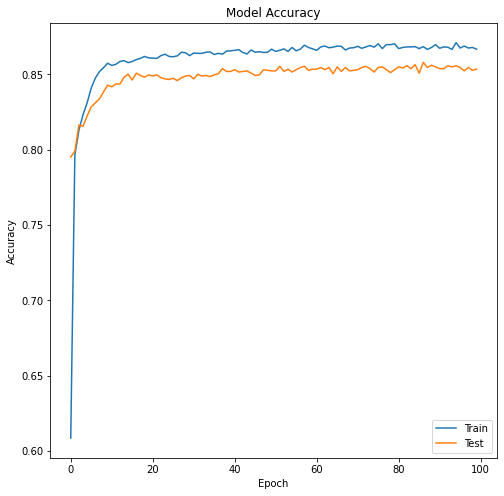

In [33]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

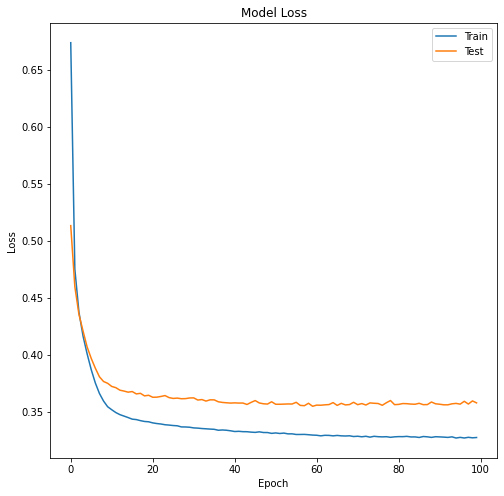

In [36]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# **Model Evaluation**

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([[0.28123137],
       [0.22735213],
       [0.17295115],
       ...,
       [0.29134572],
       [0.18200296],
       [0.2689396 ]], dtype=float32)

In [46]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1510,   85],
       [ 200,  205]])

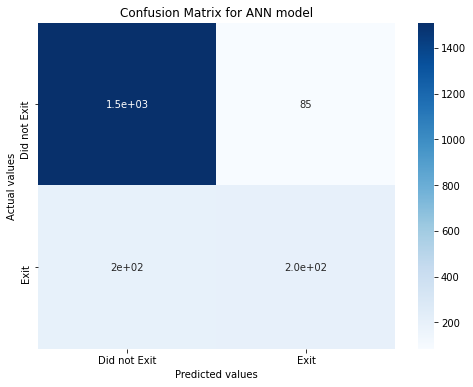

In [49]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [50]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.75%


# **Predictions**

In [0]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [57]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [58]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: High change of exit!
